153


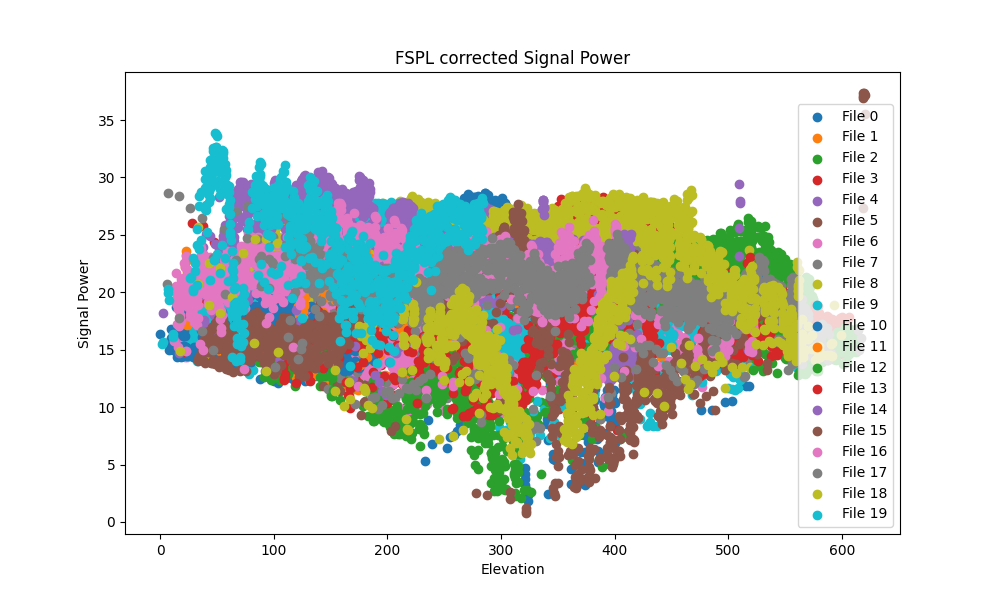

In [13]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import noisy_moose as nm
import pickle
import os
from multiprocessing import Pool
import datetime

data_files_active = os.listdir("../no_waterfall/active/")
# data_files_inactive = os.listdir("no_waterfall/inactive/")
vzlusat_active = list(i for i in data_files_active if "VZLUSAT-2" in i)
# grbalpha_inactive = list(i for i in data_files_inactive if "GRBALPHA" in i)
# uvsq_inactive = list(i for i in data_files_inactive if "UVSQ" in i)

obj_act: list[nm.prepping] = [] #: list[nm.prepping] = [] means that the variable is a list of nm.prepping objects, which makes it possible to autocomplete the methods and attributes of the nm.prepping class.

for i in vzlusat_active:
    with open("../no_waterfall/active/" + i, 'rb') as f:
        obj_act.append(pickle.loads(f.read()))

# pointing error calculation

def calculate_pointing_error(set_azimuth, set_elevation, azimuth, elevation):
    """
    Calculate the pointing error given reference (set) and measured azimuth and elevation.
    
    Parameters:
        set_azimuth (array-like): Reference azimuth values in degrees.
        set_elevation (array-like): Reference elevation values in degrees.
        azimuth (array-like): Measured azimuth values in degrees.
        elevation (array-like): Measured elevation values in degrees.
    
    Returns:
        np.ndarray: Pointing error for each pair of reference and measured angles in degrees.
    """
    # Convert degrees to radians
    set_azimuth_rad = np.radians(set_azimuth)
    set_elevation_rad = np.radians(set_elevation)
    azimuth_rad = np.radians(azimuth)
    elevation_rad = np.radians(elevation)
    
    # Compute the pointing error using the great-circle distance formula
    pointing_error_rad = np.arccos(
        np.sin(set_elevation_rad) * np.sin(elevation_rad) +
        np.cos(set_elevation_rad) * np.cos(elevation_rad) * np.cos(azimuth_rad - set_azimuth_rad)
    )
    
    # Convert the pointing error back to degrees
    pointing_error_deg = np.degrees(pointing_error_rad)
    return pointing_error_deg
print(len(obj_act))

for i, obj in enumerate(obj_act):
    obj.station_obj.convert_timestamp() #converts the timestamps for the station object to numpy array
    
    idx = np.argwhere(10*np.log10(obj.noise_obj.signal_abs) > -138) #Threshold set to -138 dBm
    obj_act[i]=obj[idx] #Basically deleting all the points where the moving average is below the threshold

    obj=obj_act[i] #for calculating Pointing error
    # Calculate pointing error for this object
    pointing_error = calculate_pointing_error(
        set_azimuth=obj.station_obj.set_azimuth,
        set_elevation=obj.station_obj.set_elevation,
        azimuth=obj.station_obj.azimuth,
        elevation=obj.station_obj.elevation
    )
    # Append the pointing error as a new attribute to the object
    obj_act[i].pointing_error = pointing_error
    
# Plot the first feature (e.g., signal power) for some files
plt.figure(figsize=(10, 6))
for i in range(20):
    # plt.figure(figsize=(10, 6))
    # plt.scatter(obj_act[i].time_ax,10*np.log10(obj_act[i].noise_obj.signal_abs), label=f'File {i}')  # Plot Feature 2 (Signal Power)
    plt.scatter(obj_act[i].time_ax,obj_act[i].clean_sig_abs, label=f'File {i}')  # Plot Feature 2 (Signal Power)
plt.xlabel('Elevation')
plt.ylabel('Signal Power')
plt.title('FSPL corrected Signal Power')
plt.legend()
plt.show()

['GRBALPHA_20241017T082528_pickled.bin', 'GRBALPHA_20241017T224535_pickled.bin', 'GRBALPHA_20241018T001903_pickled.bin', 'GRBALPHA_20241018T110034_pickled.bin', 'GRBALPHA_20241018T221326_pickled.bin', 'GRBALPHA_20241018T234627_pickled.bin', 'GRBALPHA_20241019T085324_pickled.bin', 'GRBALPHA_20241019T102657_pickled.bin', 'GRBALPHA_20241019T214126_pickled.bin', 'GRBALPHA_20241020T224123_pickled.bin', 'GRBALPHA_20241022T230911_pickled.bin', 'GRBALPHA_20241023T094901_pickled.bin', 'GRBALPHA_20241024T105037_pickled.bin', 'GRBALPHA_20241025T230331_pickled.bin', 'GRBALPHA_20241026T223029_pickled.bin', 'GRBALPHA_20241027T000340_pickled.bin', 'GRBALPHA_20241027T233012_pickled.bin', 'GRBALPHA_20241028T083709_pickled.bin', 'GRBALPHA_20241028T100958_pickled.bin', 'GRBALPHA_20241028T225645_pickled.bin', 'GRBALPHA_20241029T003018_pickled.bin', 'GRBALPHA_20241030T090242_pickled.bin', 'GRBALPHA_20241030T103630_pickled.bin', 'GRBALPHA_20241030T232232_pickled.bin', 'GRBALPHA_20241031T005632_pickled.bin',

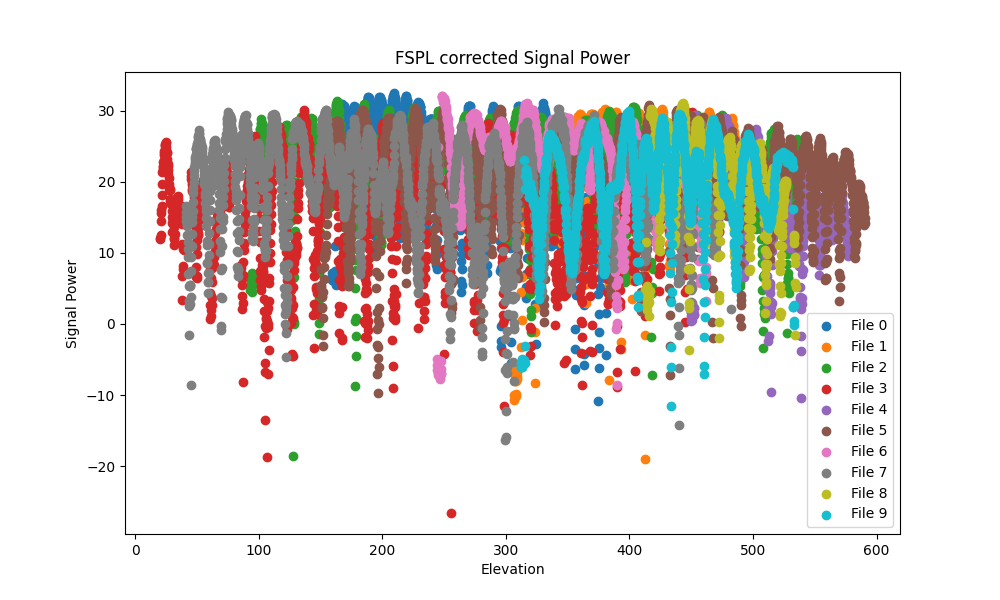

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import noisy_moose as nm
import pickle
import os
from multiprocessing import Pool
import datetime

data_files_active = os.listdir("../no_waterfall/active/")
print(data_files_active)
# data_files_inactive = os.listdir("no_waterfall/inactive/")
grbalpha_active = list(i for i in data_files_active if "GRBALPHA" in i)
# grbalpha_inactive = list(i for i in data_files_inactive if "GRBALPHA" in i)
# uvsq_inactive = list(i for i in data_files_inactive if "UVSQ" in i)

obj_act: list[nm.prepping] = [] #: list[nm.prepping] = [] means that the variable is a list of nm.prepping objects, which makes it possible to autocomplete the methods and attributes of the nm.prepping class.

for i in grbalpha_active:
    with open("../no_waterfall/active/" + i, 'rb') as f:
        obj_act.append(pickle.loads(f.read()))

# pointing error calculation

def calculate_pointing_error(set_azimuth, set_elevation, azimuth, elevation):
    """
    Calculate the pointing error given reference (set) and measured azimuth and elevation.
    
    Parameters:
        set_azimuth (array-like): Reference azimuth values in degrees.
        set_elevation (array-like): Reference elevation values in degrees.
        azimuth (array-like): Measured azimuth values in degrees.
        elevation (array-like): Measured elevation values in degrees.
    
    Returns:
        np.ndarray: Pointing error for each pair of reference and measured angles in degrees.
    """
    # Convert degrees to radians
    set_azimuth_rad = np.radians(set_azimuth)
    set_elevation_rad = np.radians(set_elevation)
    azimuth_rad = np.radians(azimuth)
    elevation_rad = np.radians(elevation)
    
    # Compute the pointing error using the great-circle distance formula
    pointing_error_rad = np.arccos(
        np.sin(set_elevation_rad) * np.sin(elevation_rad) +
        np.cos(set_elevation_rad) * np.cos(elevation_rad) * np.cos(azimuth_rad - set_azimuth_rad)
    )
    
    # Convert the pointing error back to degrees
    pointing_error_deg = np.degrees(pointing_error_rad)
    return pointing_error_deg


for i, obj in enumerate(obj_act):
    obj.station_obj.convert_timestamp() #converts the timestamps for the station object to numpy array

    #Thresholding by moving average
    window_size = 100

    # Pad the signal symmetrically with NaNs (or a constant like -130 to match your data)
    padded_signal = np.pad(10 * np.log10(obj.noise_obj.signal_abs), (50, 49), mode='constant', constant_values=-150)

    # Perform convolution in 'valid' mode
    moving_avg = np.convolve(padded_signal, np.ones(window_size)/window_size, mode='valid')

    idx = np.argwhere(moving_avg > -138) #Threshold set to -138 dBm
    obj_act[i]=obj[idx] #Basically deleting all the points where the moving average is below the threshold
    
    obj=obj_act[i] #for calculating Pointing error
    # Calculate pointing error for this object
    pointing_error = calculate_pointing_error(
        set_azimuth=obj.station_obj.set_azimuth,
        set_elevation=obj.station_obj.set_elevation,
        azimuth=obj.station_obj.azimuth,
        elevation=obj.station_obj.elevation
    )
    # Append the pointing error as a new attribute to the object
    obj_act[i].pointing_error = pointing_error
    
# Plot the first feature (e.g., signal power) for some files
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.scatter(obj_act[i].time_ax,obj_act[i].clean_sig_abs, label=f'File {i}')  # Plot Feature 2 (Signal Power)
plt.xlabel('Elevation')
plt.ylabel('Signal Power')
plt.title('FSPL corrected Signal Power')
plt.legend()
plt.show()

# interesting attributes

obj_act[i].time_ax

obj_act[i].clean_sig_abs

obj_act[i].pointing_error

obj_act[i].station_obj.azimuth

obj_act[i].station_obj.elevation

obj_act[i].station_obj.fspl

obj_act[i].noise_obj.noise

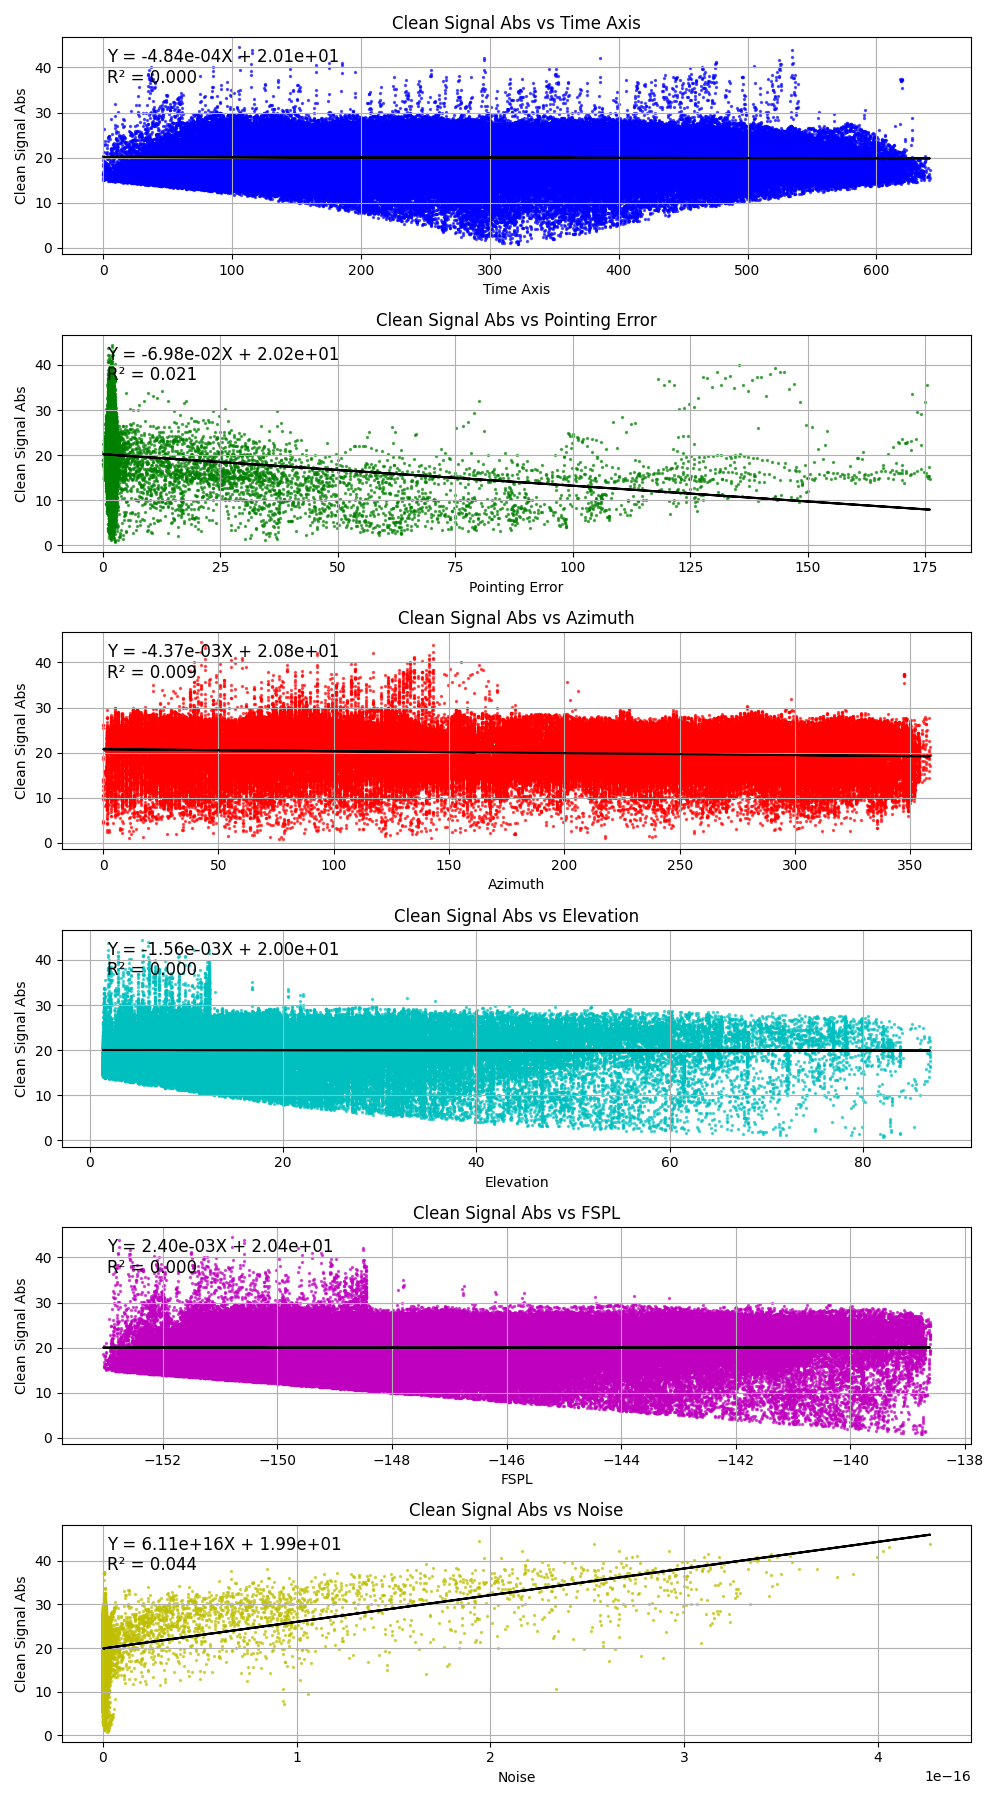

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize plots for all features
fig, axs = plt.subplots(6, 1, figsize=(10, 18), sharex=False)

# Titles for each plot
titles = [
    'Clean Signal Abs vs Time Axis',
    'Clean Signal Abs vs Pointing Error',
    'Clean Signal Abs vs Azimuth',
    'Clean Signal Abs vs Elevation',
    'Clean Signal Abs vs FSPL',
    'Clean Signal Abs vs Noise'
]

# Colors for points
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# Initialize empty lists to aggregate all the data
y_vals_all = []

# Initialize y_vals_all with empty lists for each feature
x_vals_all = [[] for _ in range(6)]

# Loop through objects and add points to each plot
for obj in obj_act:
    # Collecting all data into the aggregated lists
    y_vals_all.extend(obj.clean_sig_abs)
    
    # For each plot, collect the corresponding feature as y-values
    x_vals_all[0].extend(obj.time_ax)  # For Time Axis
    x_vals_all[1].extend(obj.pointing_error)  # For Pointing Error
    x_vals_all[2].extend(obj.station_obj.azimuth)  # For Azimuth
    x_vals_all[3].extend(obj.station_obj.elevation)  # For Elevation
    x_vals_all[4].extend(obj.station_obj.fspl)  # For FSPL
    x_vals_all[5].extend(obj.noise_obj.noise)  # For Noise

# Now we go through each plot and add a trendline based on the aggregated data
for i, ax in enumerate(axs):
    # Retrieve the feature values for this plot
    y_vals = np.array(y_vals_all).flatten()  # Flatten the list for the current feature
    
    # Convert x_vals_all into a numpy array and flatten it
    x_vals = np.array(x_vals_all[i]).flatten()
    # print(x_vals.shape)
    # print(y_vals.shape)

    # Fit a linear trendline (polynomial degree 1) to the data
    p = np.polyfit(x_vals, y_vals, 1)
    trendline = np.poly1d(p)
    
    # Plot the aggregated points and trendline
    ax.scatter(x_vals, y_vals, alpha=0.6,s=2, color=colors[i], label=f'All Data {titles[i]}')
    ax.plot(x_vals, trendline(x_vals), color='black', label='Trendline')

    # Calculate R-squared
    y_pred = trendline(x_vals)
    residuals = y_vals - y_pred
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y_vals - np.mean(y_vals))**2)
    r2 = 1 - (ss_res / ss_tot)

    # Display the trendline equation and R-squared on the plot
    ax.text(0.05, 0.95, f'Y = {p[0]:.2e}X + {p[1]:.2e}\nR² = {r2:.3f}', transform=ax.transAxes,
            fontsize=12, verticalalignment='top', color='black')

# Customize plots
for i, ax in enumerate(axs):
    ax.set_title(titles[i])
    ax.set_xlabel(titles[i].split('vs ')[1])
    ax.set_ylabel('Clean Signal Abs')  # Extract feature name for ylabel
    ax.grid(True)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


(127587,)
(127587,)


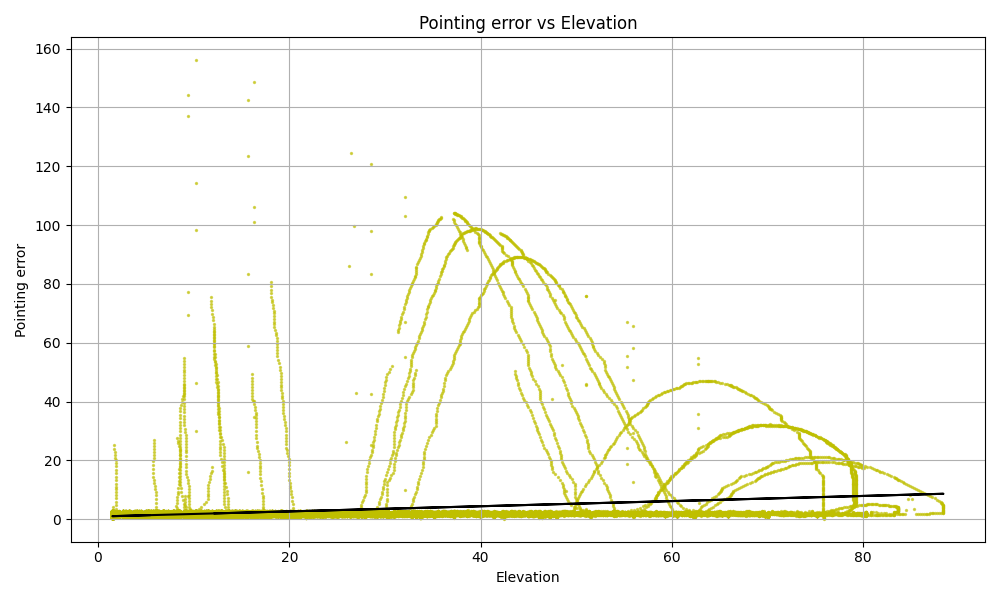

In [3]:
# Loop through objects and add points to each plot
x_vals_all = []
y_vals_all = []

for obj in obj_act:
    y_vals_all.extend(obj.pointing_error)
    x_vals_all.extend(obj.station_obj.elevation)


# Retrieve the feature values for this plot
y_vals = np.array(y_vals_all).flatten()  # Flatten the list for the current feature

# Convert x_vals_all into a numpy array and flatten it
x_vals = np.array(x_vals_all).flatten()
print(x_vals.shape)
print(y_vals.shape)

# Fit a linear trendline (polynomial degree 1) to the data
p = np.polyfit(x_vals, y_vals, 1)
trendline = np.poly1d(p)

# Plot the aggregated points and trendline
plt.figure(figsize=(10, 6))
plt.scatter(x_vals, y_vals, alpha=0.6,s=2, color=colors[i], label=f'All Data {titles[i]}')
plt.plot(x_vals, trendline(x_vals), color='black', label='Trendline')
plt.title('Pointing error vs Elevation')
plt.xlabel('Elevation')
plt.ylabel('Pointing error')  # Extract feature name for ylabel
plt.grid(True)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [3]:
# Step 1: Calculate mean pointing error for each object
meanpoint = [np.mean(obj.pointing_error) for obj in obj_act]  # List of mean pointing errors for all objects

# Step 2: Get the indices of the 10 largest mean pointing errors
top_10_indices = np.argsort(meanpoint)[-10:]  # Indices of the 10 largest values (sorted in ascending order, so we take the last 10)

# Step 3: Retrieve the objects with the 10 largest mean pointing errors
top_10_objects = [obj_act[i] for i in top_10_indices]  # List of the 10 objects with the largest mean pointing errors

# Optionally, display the mean pointing errors for these top 10 objects
for i, obj in enumerate(top_10_objects):
    print(f"Object {i+1}: {meanpoint[top_10_indices[i]]:.2f} , at index {top_10_indices[i]}")



Object 1: 3.40 , at index 60
Object 2: 3.50 , at index 64
Object 3: 4.22 , at index 78
Object 4: 4.83 , at index 13
Object 5: 4.99 , at index 42
Object 6: 5.35 , at index 37
Object 7: 8.37 , at index 10
Object 8: 9.05 , at index 31
Object 9: 9.26 , at index 55
Object 10: 9.83 , at index 74


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import noisy_moose as nm
import pickle
import os
from multiprocessing import Pool

# List to store the objects corresponding to the top 10 indices
obj_act_top10: list[nm.prepping] = []

# Get the filenames of the top 10 objects using the top_10_indices
top_10_filenames = [obj_act[i].filename for i in top_10_indices]
print(top_10_filenames)
# List all files in the directory
data_files_active_water = os.listdir("../waterfall/active")

# Filter out the relevant files for GRBALPHA
grbalpha_active_water = [i for i in data_files_active_water if "GRBALPHA" in i]
print(grbalpha_active_water)

# Iterate over the top 10 filenames and open the corresponding files
for filename in top_10_filenames:
    if filename+'_pickled.bin' in grbalpha_active_water:  # Check if the file exists in the list of active files
        with open("../waterfall/active/" + filename + "_pickled.bin", 'rb') as f:
            obj_act_top10.append(pickle.loads(f.read()))  # Load the file and append the object to the list

# Now obj_act_top10 contains the loaded objects corresponding to the top 10 mean pointing errors
print(filename+'_pickled.bin')

def work(obj: nm.prepping):
    plt.figure()
    obj.noise_obj.plot_waterfall()
    print(obj.filename)
    
# for obj in obj_act_top10:
#     work(obj)

# if __name__ == "__main__":
#     with Pool(10) as pool:
#         pool.map(work, obj_act_top10)


print(obj_act_top10)

['GRBALPHA_20241112T233453', 'GRBALPHA_20241113T225905', 'GRBALPHA_20241118T230433', 'GRBALPHA_20241025T230331', 'GRBALPHA_20241105T230254', 'GRBALPHA_20241104T091807', 'GRBALPHA_20241022T230911', 'GRBALPHA_20241102T231327', 'GRBALPHA_20241110T231310', 'GRBALPHA_20241117T092216']
['GRBALPHA_20241017T082528_pickled.bin', 'GRBALPHA_20241017T224535_pickled.bin', 'GRBALPHA_20241018T001903_pickled.bin', 'GRBALPHA_20241018T110034_pickled.bin', 'GRBALPHA_20241018T221326_pickled.bin', 'GRBALPHA_20241018T234627_pickled.bin', 'GRBALPHA_20241019T085324_pickled.bin', 'GRBALPHA_20241019T102657_pickled.bin', 'GRBALPHA_20241019T214126_pickled.bin', 'GRBALPHA_20241020T224123_pickled.bin', 'GRBALPHA_20241022T230911_pickled.bin', 'GRBALPHA_20241023T094901_pickled.bin', 'GRBALPHA_20241024T105037_pickled.bin', 'GRBALPHA_20241025T230331_pickled.bin', 'GRBALPHA_20241026T223029_pickled.bin', 'GRBALPHA_20241027T000340_pickled.bin', 'GRBALPHA_20241027T233012_pickled.bin', 'GRBALPHA_20241028T083709_pickled.bin'

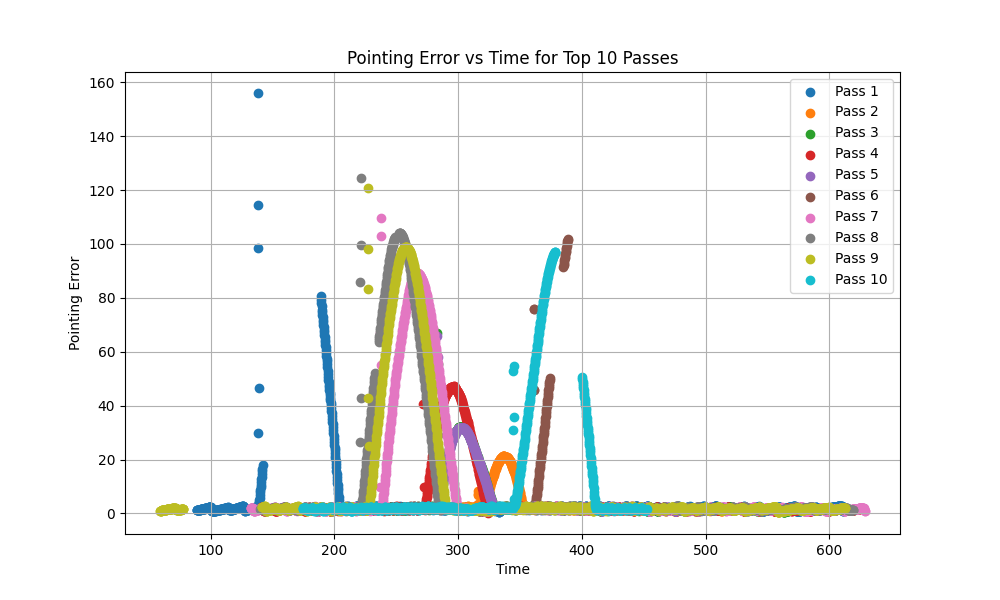

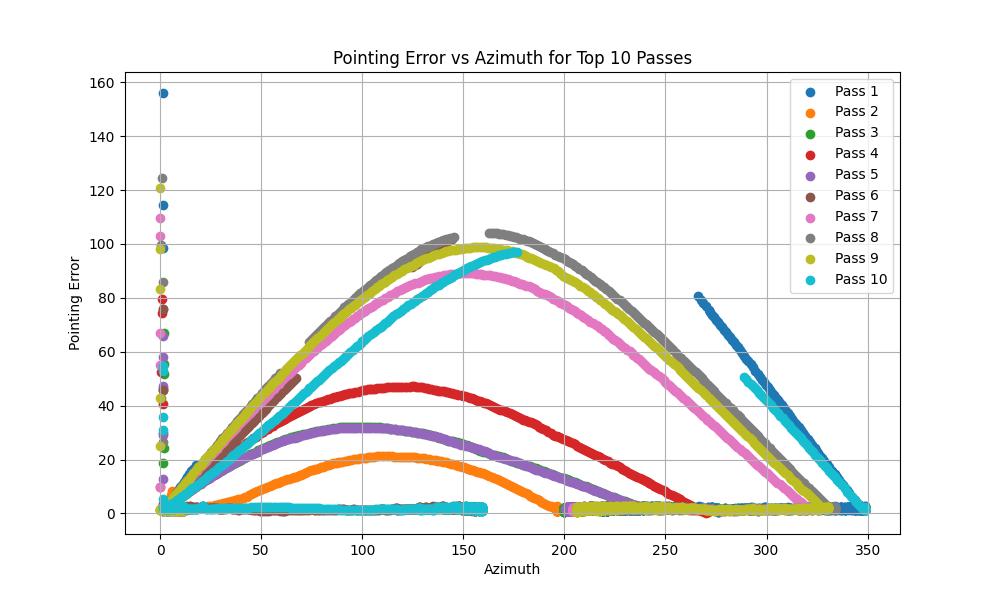

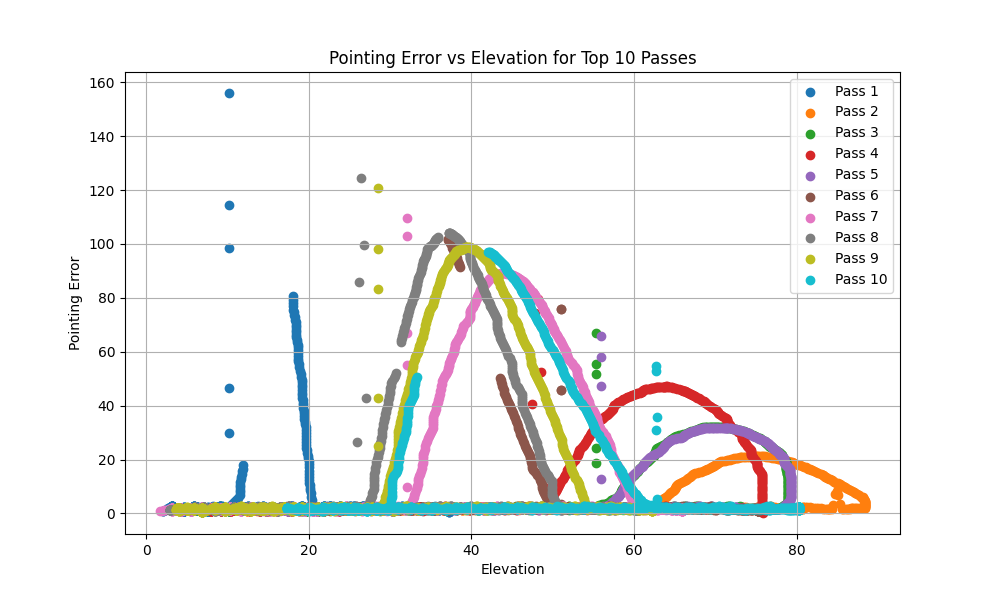

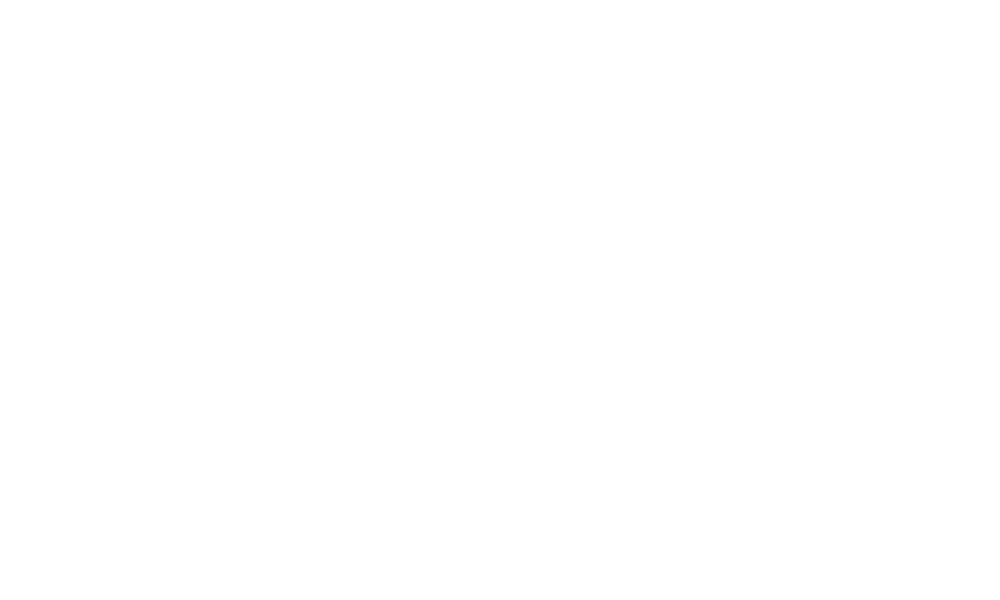

In [5]:
plt.figure(figsize=(10, 6))

# Loop through the top 10 objects and plot the pointing error vs elevation
for i, obj in enumerate(top_10_objects):
    plt.scatter(obj.time_ax, obj.pointing_error, label=f'Pass {i+1}')

plt.xlabel('Time')
plt.ylabel('Pointing Error')
plt.title('Pointing Error vs Time for Top 10 Passes')
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 6))

plt.figure(figsize=(10, 6))
# Loop through the top 10 objects and plot the pointing error vs elevation
for i, obj in enumerate(top_10_objects):
    plt.scatter(obj.station_obj.azimuth, obj.pointing_error, label=f'Pass {i+1}')

plt.xlabel('Azimuth')
plt.ylabel('Pointing Error')
plt.title('Pointing Error vs Azimuth for Top 10 Passes')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
# Loop through the top 10 objects and plot the pointing error vs elevation
for i, obj in enumerate(top_10_objects):
    plt.scatter(obj.station_obj.elevation, obj.pointing_error, label=f'Pass {i+1}')

plt.xlabel('Elevation')
plt.ylabel('Pointing Error')
plt.title('Pointing Error vs Elevation for Top 10 Passes')
plt.legend()
plt.grid(True)
plt.show()


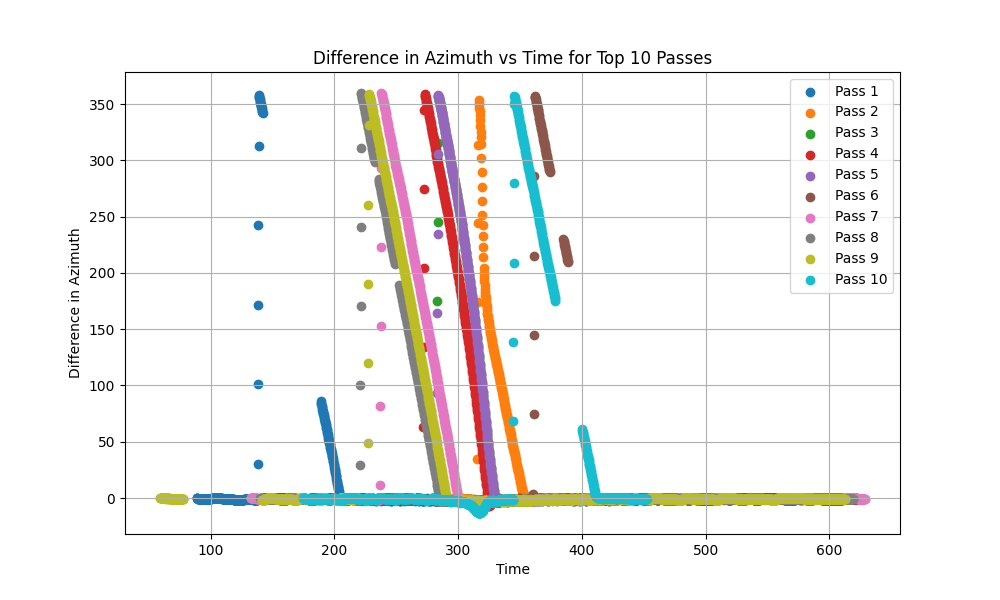

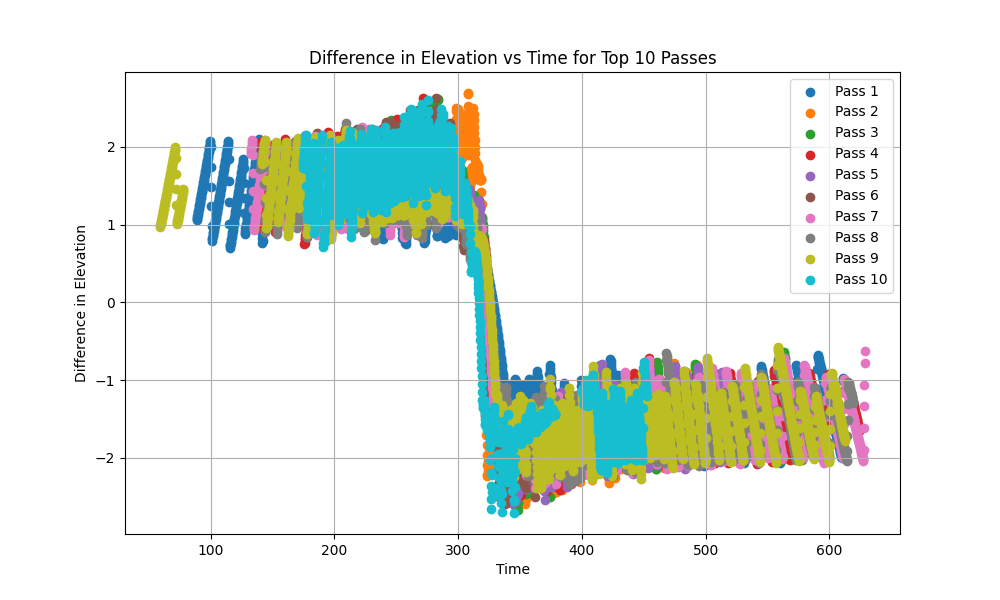

In [6]:
plt.figure(figsize=(10, 6))
# Loop through the top 10 objects and plot the pointing error vs elevation
for i, obj in enumerate(top_10_objects):
    plt.scatter(obj.time_ax,obj.station_obj.set_azimuth-obj.station_obj.azimuth, label=f'Pass {i+1}')

plt.xlabel('Time')
plt.ylabel('Difference in Azimuth')
plt.title('Difference in Azimuth vs Time for Top 10 Passes')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
# Loop through the top 10 objects and plot the pointing error vs elevation
for i, obj in enumerate(top_10_objects):
    plt.scatter(obj.time_ax,obj.station_obj.set_elevation-obj.station_obj.elevation, label=f'Pass {i+1}')

plt.xlabel('Time')
plt.ylabel('Difference in Elevation')
plt.title('Difference in Elevation vs Time for Top 10 Passes')
plt.legend()
plt.grid(True)
plt.show()

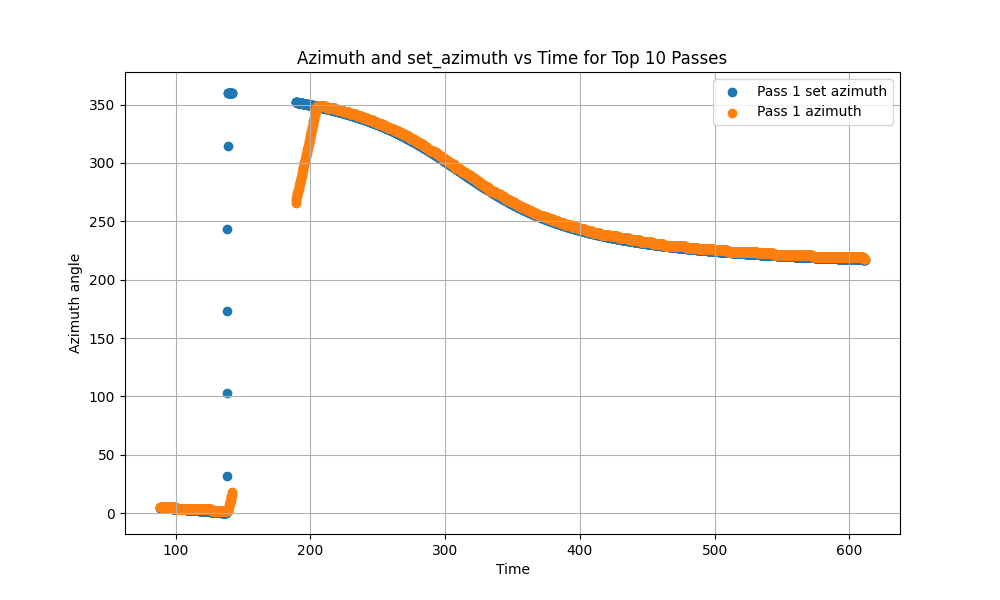

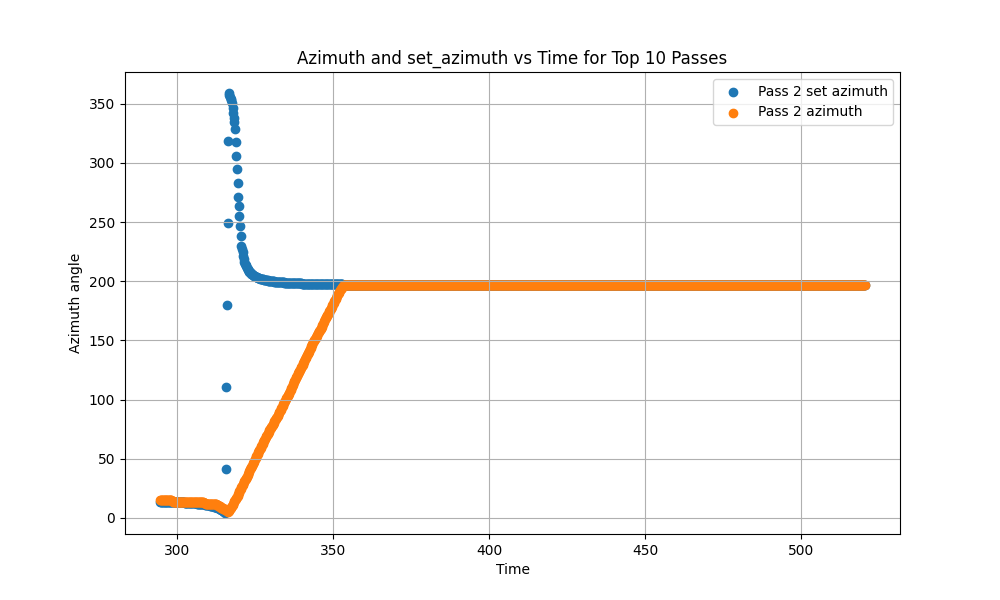

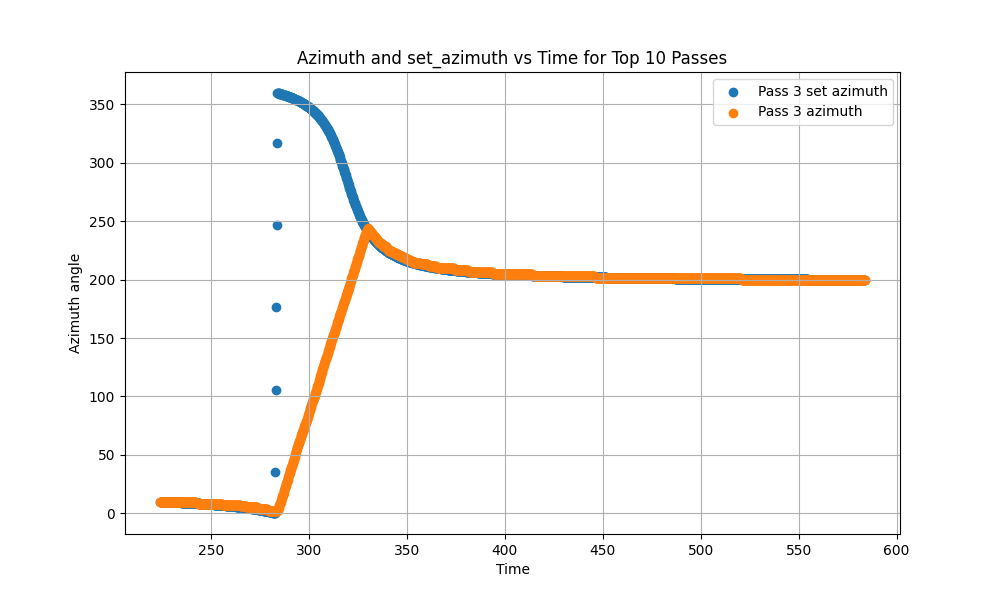

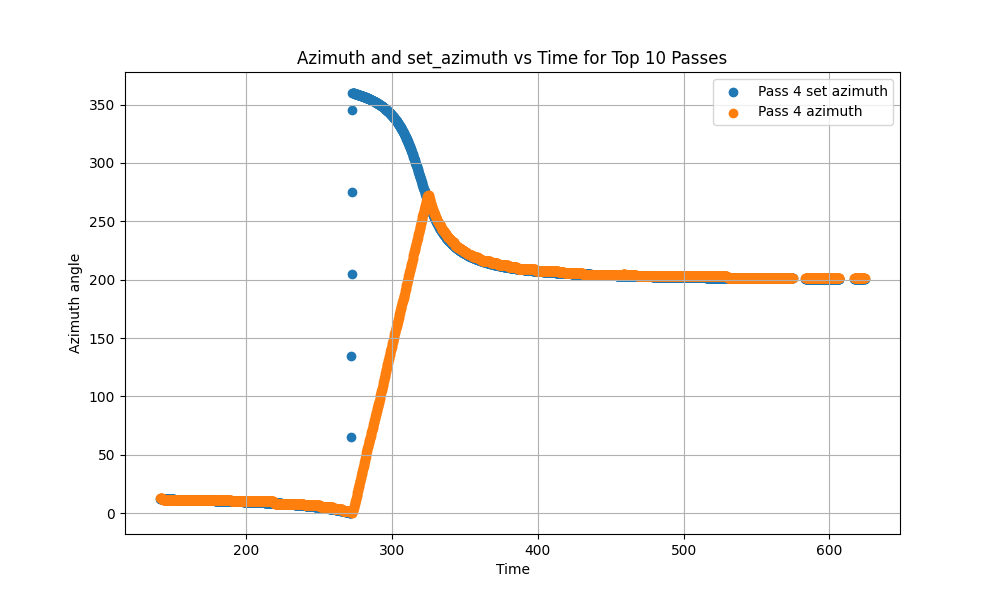

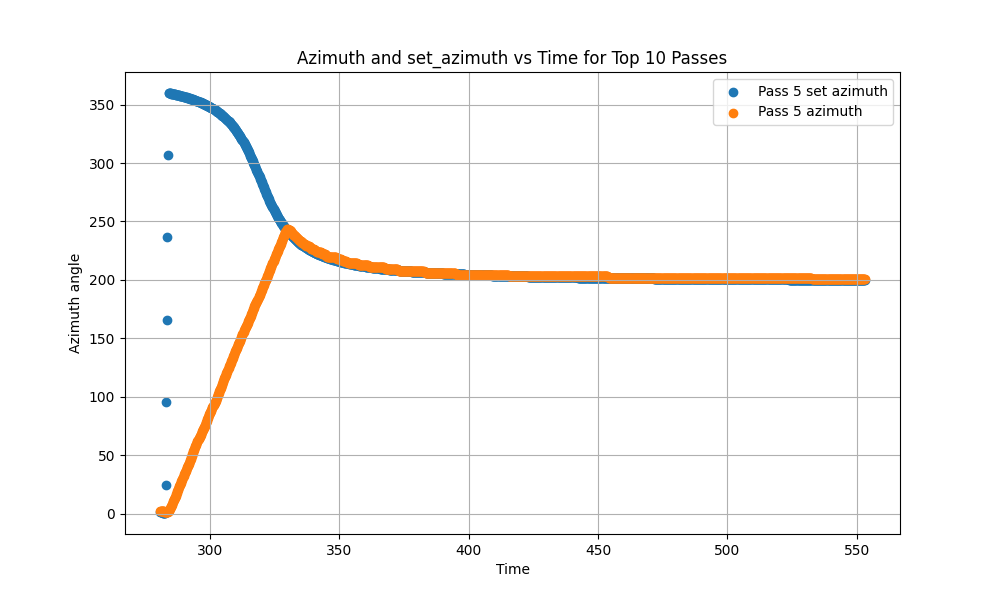

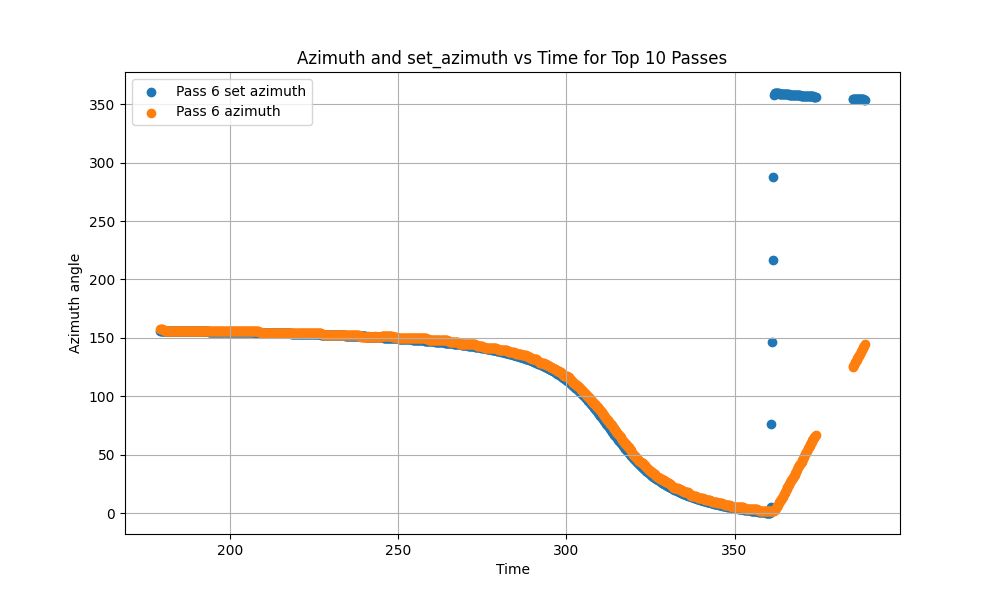

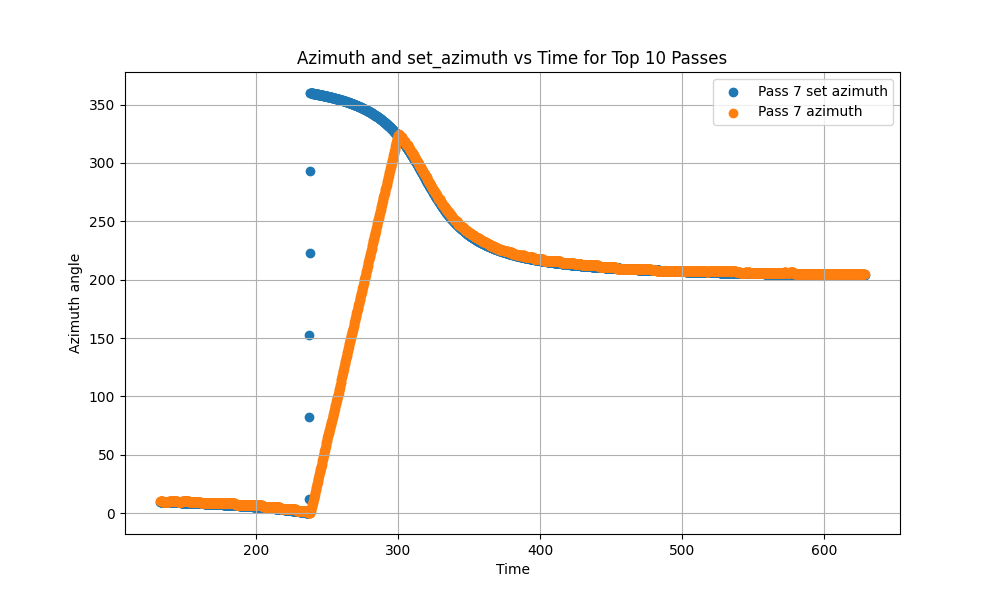

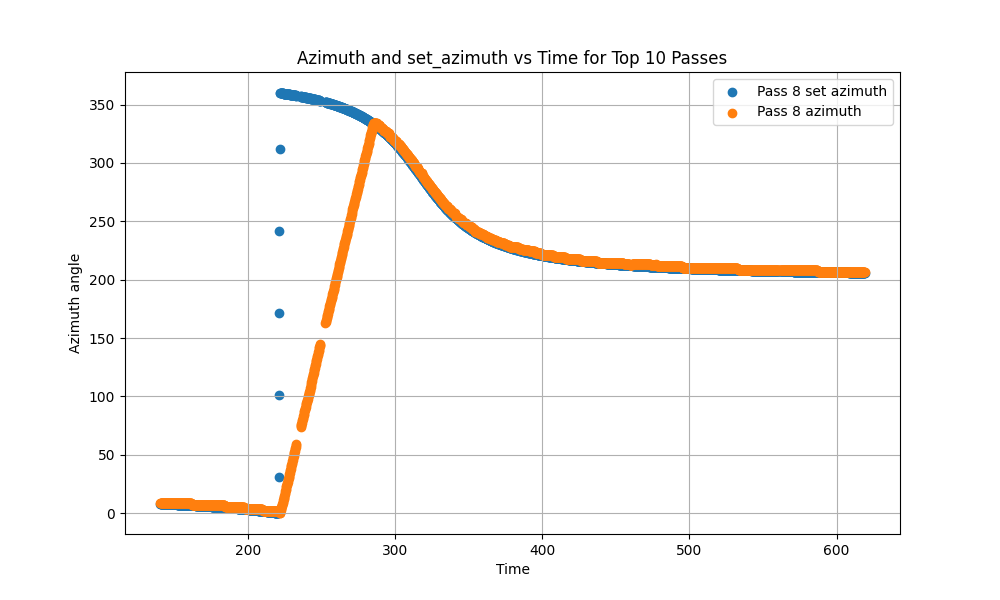

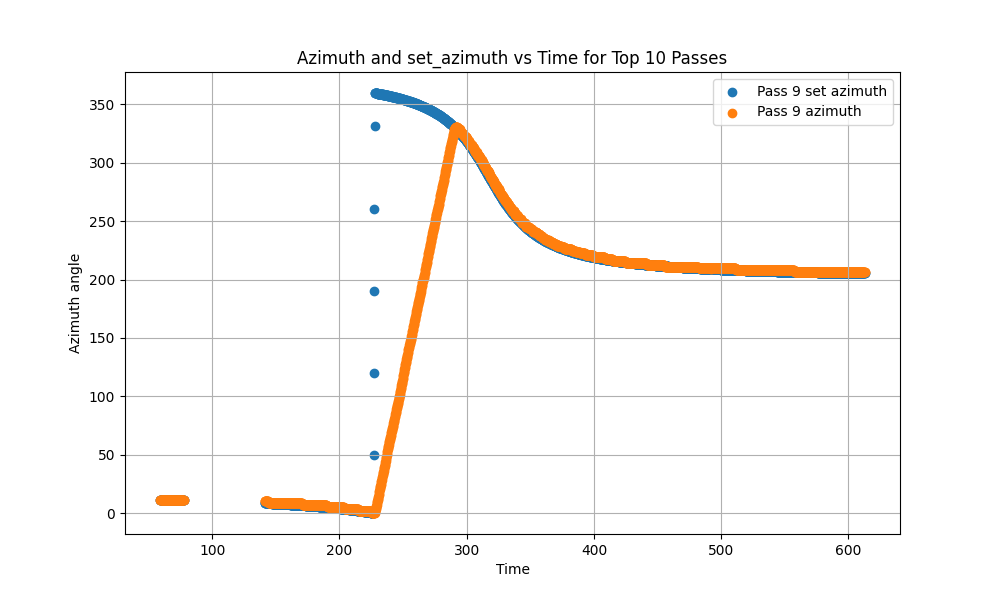

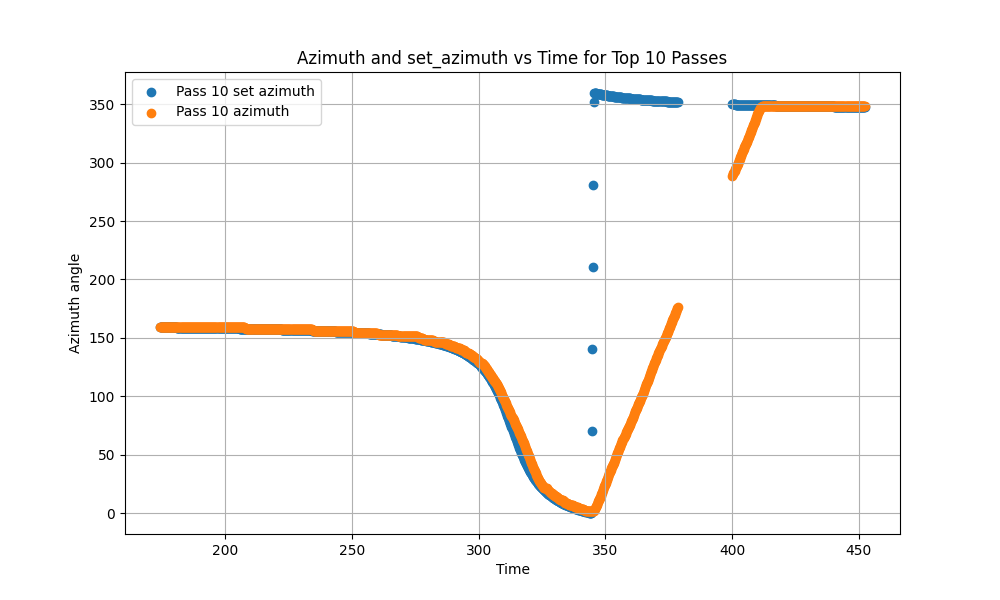

In [7]:

# Loop through the top 10 objects and plot the pointing error vs elevation
for i, obj in enumerate(top_10_objects):
    plt.figure(figsize=(10, 6))
    plt.scatter(obj.time_ax,obj.station_obj.set_azimuth, label=f'Pass {i+1} set azimuth')
    plt.scatter(obj.time_ax,obj.station_obj.azimuth, label=f'Pass {i+1} azimuth')
    plt.xlabel('Time')
    plt.ylabel('Azimuth angle')
    plt.title('Azimuth and set_azimuth vs Time for Top 10 Passes')
    plt.legend()
    plt.grid(True)
    plt.show()



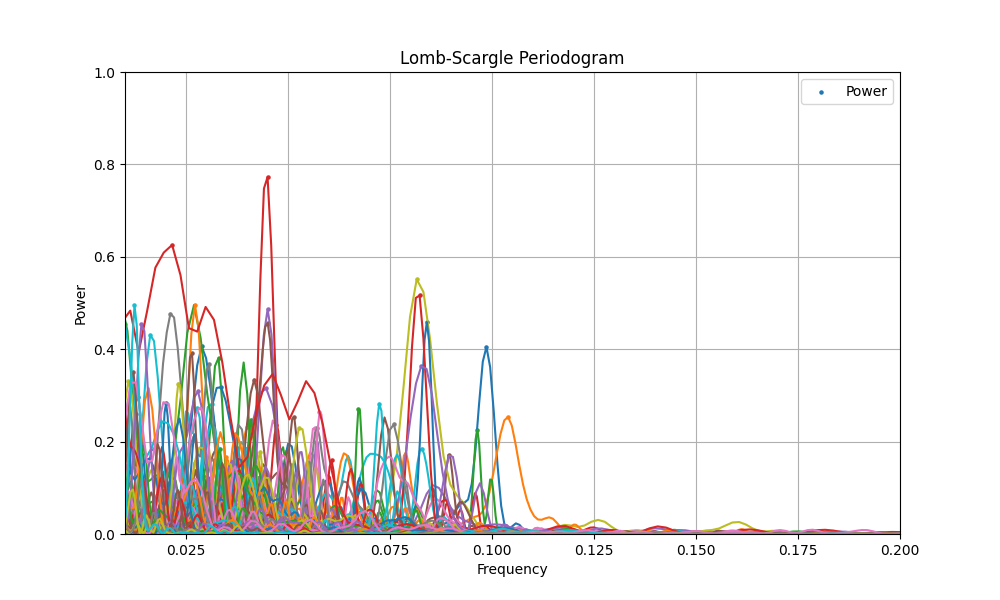

In [8]:
from astropy.timeseries import LombScargle
time=obj_act[0].time_ax.flatten()
values=obj_act[0].clean_sig_abs.flatten()
frequency, power = LombScargle(time, values).autopower()
plt.figure(figsize=(10, 6))
frequency=[]
power=[]

for i,obj in enumerate(obj_act[:80]):
    time=obj.time_ax.flatten()
    values=10**(obj.clean_sig_abs.flatten()/10)
    freq, pow = LombScargle(time, values).autopower(normalization='standard')
    freq=freq[:1000]
    pow=pow[:1000]
    obj_act[i].max_spin_freq=freq[np.argmax(pow)]
    plt.scatter(obj_act[i].max_spin_freq,np.max(pow),s=5)
    # if len(frequency) == 0:
    #     frequency[:1000] = freq[:1000]
    #     power[:1000] = pow[:1000]
    # else:
    #     power += pow[:1000] 

    plt.plot(freq, pow)
plt.xlim(0.01, 0.2)
plt.ylim(0, 1)
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.title('Lomb-Scargle Periodogram')
plt.legend(['Power'])
plt.grid(True)
plt.show()


# Try to find any correlation between spin and passes

In [9]:

for i in range(80):
    obj_act[i].Max_ele=max(obj_act[i].station_obj.elevation)
    idx= np.argmax(obj_act[i].station_obj.elevation)
    obj_act[i].Azi_at_max=obj_act[i].station_obj.azimuth[idx]
    freq, pow = LombScargle(time, values).autopower(normalization='standard')
    freq=freq[:1000]
    pow=pow[:1000]
    obj_act[i].max_spin_freq=freq[np.argmax(pow)]


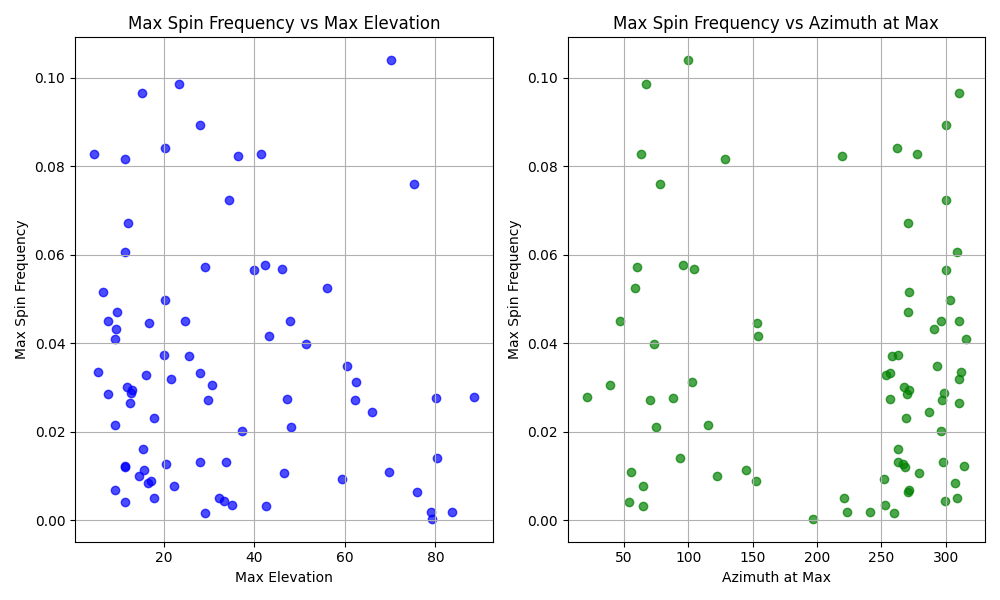

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `obj_act` is defined and populated with the relevant attributes
# Extract data for plotting
max_ele_values = [obj.Max_ele for obj in obj_act]
azi_at_max_values = [obj.Azi_at_max for obj in obj_act]
max_spin_freq_values = [obj.max_spin_freq for obj in obj_act]

# Plot max_spin_freq vs Max_ele
plt.figure(figsize=(10, 6))

# First plot: max_spin_freq vs Max_ele
plt.subplot(1, 2, 1)
plt.scatter(max_ele_values, max_spin_freq_values, c='blue', alpha=0.7)
plt.title('Max Spin Frequency vs Max Elevation')
plt.xlabel('Max Elevation')
plt.ylabel('Max Spin Frequency')
plt.grid(True)

# Second plot: max_spin_freq vs Azi_at_max
plt.subplot(1, 2, 2)
plt.scatter(azi_at_max_values, max_spin_freq_values, c='green', alpha=0.7)
plt.title('Max Spin Frequency vs Azimuth at Max')
plt.xlabel('Azimuth at Max')
plt.ylabel('Max Spin Frequency')
plt.grid(True)

# Adjust layout for better display
plt.tight_layout()
plt.show()


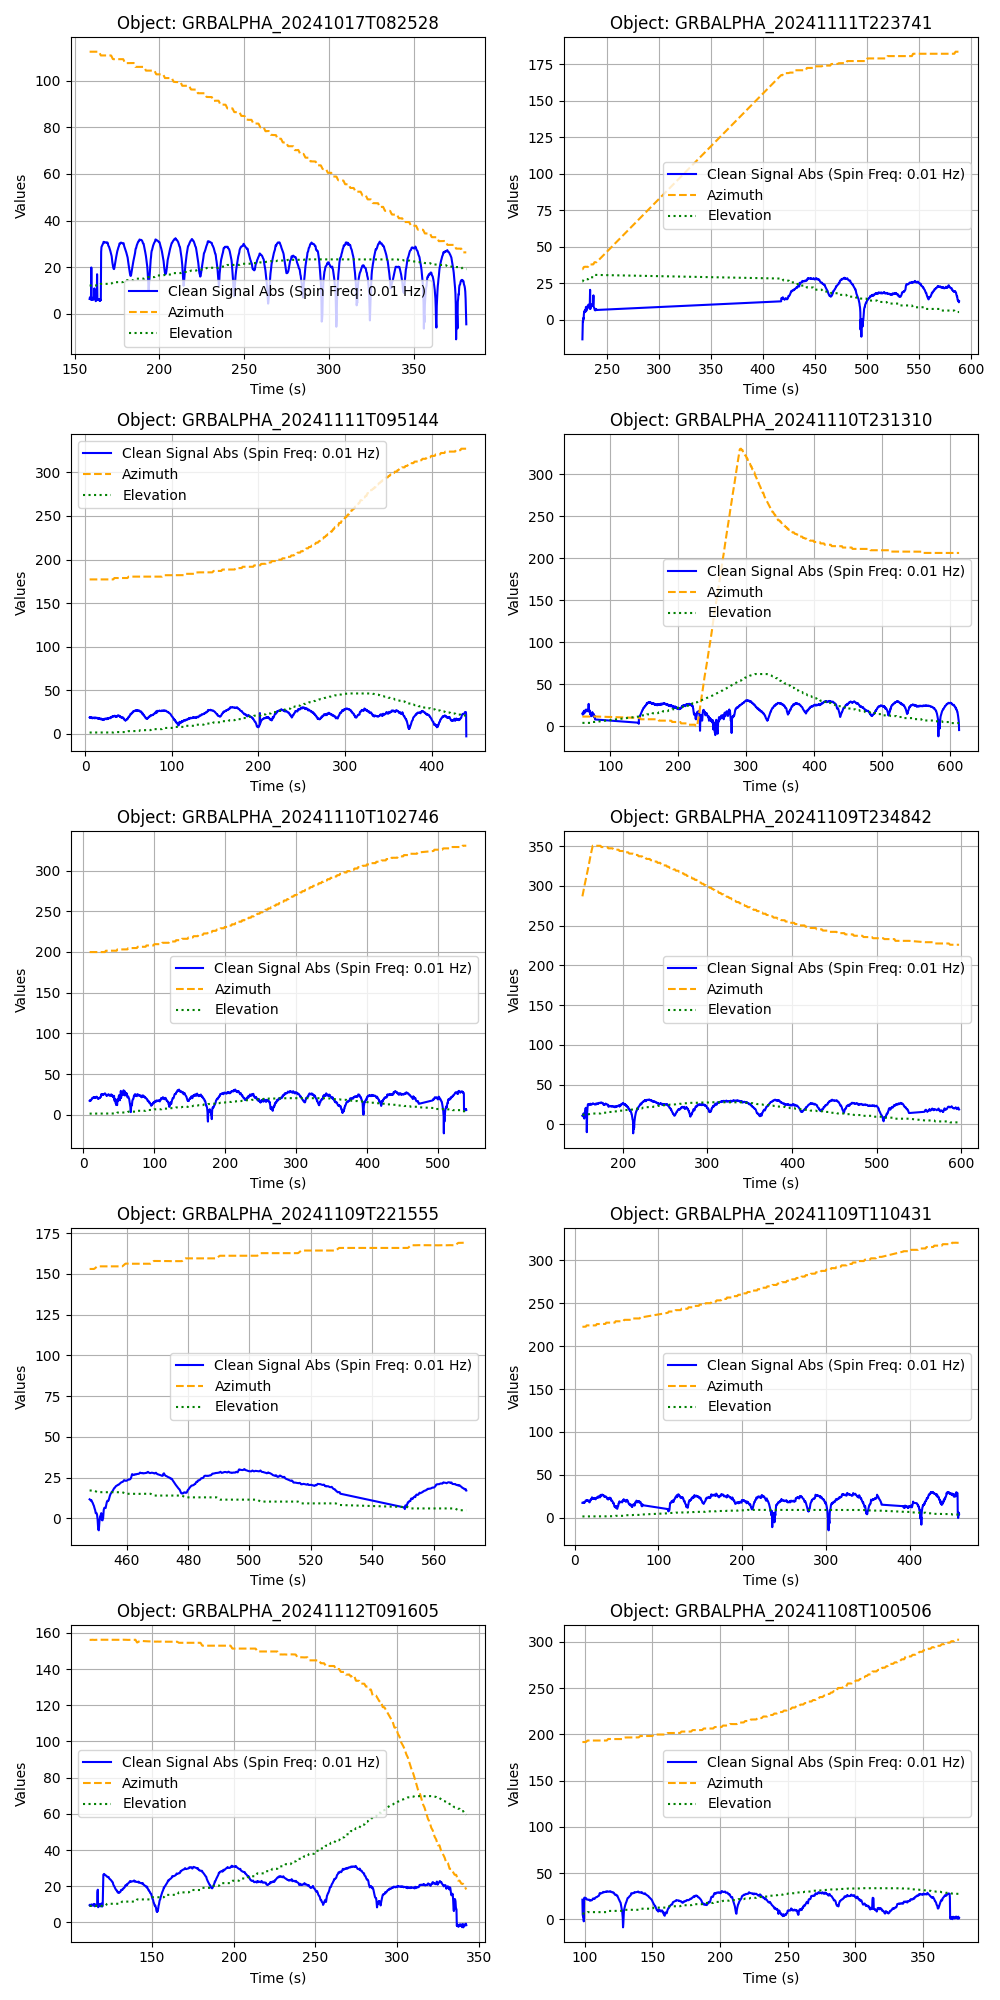

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming obj_act is defined and populated with the relevant attributes

# Extract max_spin_freq values and find indices of the top 10
max_spin_freq_values = [obj.max_spin_freq for obj in obj_act]
top_indices = np.argsort(max_spin_freq_values)[-10:][::-1]
bottom_indices = np.argsort(max_spin_freq_values)[:10]  # Bottom 10 indices in ascending order

# Create plots for the top 10 objects
plt.figure(figsize=(10, 20))  # Adjust size for 10 subplots
for i, idx in enumerate(bottom_indices):
# for i, idx in enumerate(top_indices):
    obj = obj_act[idx]
    
    # Create subplot for each object
    plt.subplot(5, 2, i + 1)  # Create a grid of 5 rows and 2 columns
    
    # Plot clean_signal_abs
    plt.plot(obj.time_ax, obj.clean_sig_abs, label=f"Clean Signal Abs (Spin Freq: {obj.max_spin_freq:.2f} Hz)", color='blue')
    
    # Plot azimuth
    plt.plot(obj.time_ax, obj.station_obj.azimuth, label="Azimuth", color='orange', linestyle='--')
    
    # Plot elevation
    plt.plot(obj.time_ax, obj.station_obj.elevation, label="Elevation", color='green', linestyle=':')
    
    # Title and labels
    plt.title(f"Object: {obj.filename}")
    plt.xlabel("Time (s)")
    plt.ylabel("Values")
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()


# comparison between long and short sine, to test if larger frequency resolution would benefit the lomb scargle periodogram, but it does not seem like

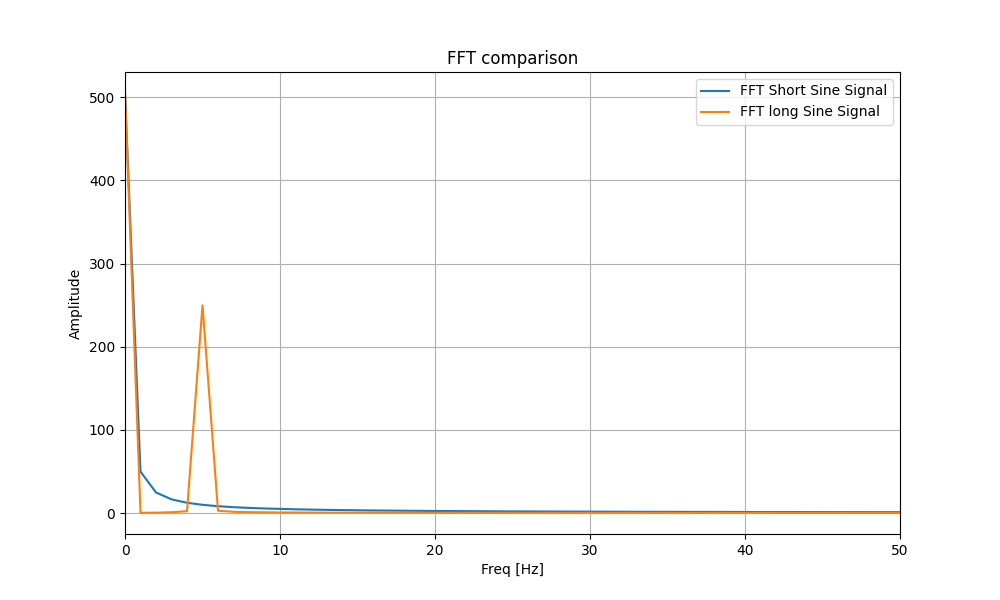

In [11]:
# Generate a sine signal 
t = np.linspace(-0.01, 0.01, 500)  # Time vector
frequency = 5  # Frequency of the sine wave
amplitude = 1  # Amplitude of the sine wave
sine_signal = 1.01+amplitude * np.sin(2 * np.pi * frequency * t)
fftshort=np.fft.fft(sine_signal)

# Generate a sine signal
t = np.linspace(0, 1, 500)  # Time vector
frequency = 5  # Frequency of the sine wave
amplitude = 1  # Amplitude of the sine wave
sine_signal = 1.01+amplitude * np.sin(2 * np.pi * frequency * t)
fftlong=np.fft.fft(sine_signal)

# Plot the sine signal in linear scale
plt.figure(figsize=(10, 6))
plt.plot(abs(fftshort), label='FFT Short Sine Signal')
plt.xlim([0, 50])
plt.plot(abs(fftlong), label='FFT long Sine Signal')
plt.xlabel('Freq [Hz]')
plt.ylabel('Amplitude')
plt.title('FFT comparison')
plt.legend()
plt.grid(True)
plt.show()

# attempt to find the rotation axis from the time of no fading

satellite pass GRBALPHA_20241118T230433
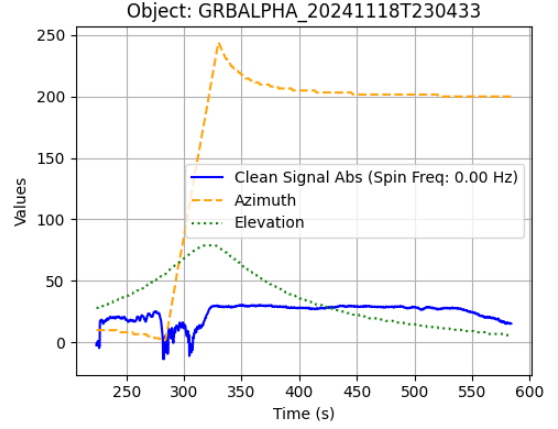
for obj in obj_act
    print(obj.filename)

78
GRBALPHA_20241118T230433


C:\Users\StoreElberg\AppData\Local\Temp\ipykernel_43532\443596730.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


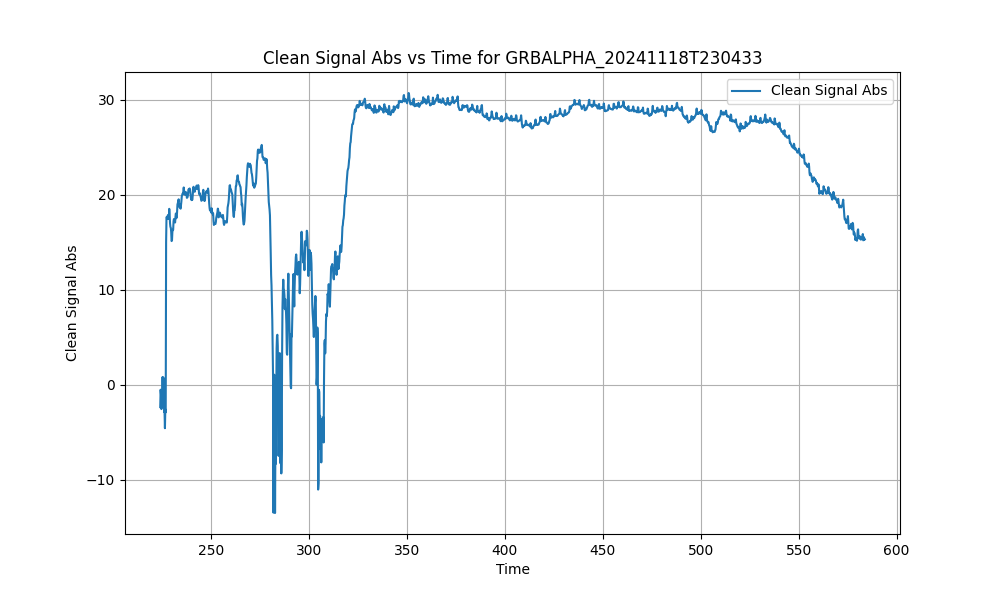

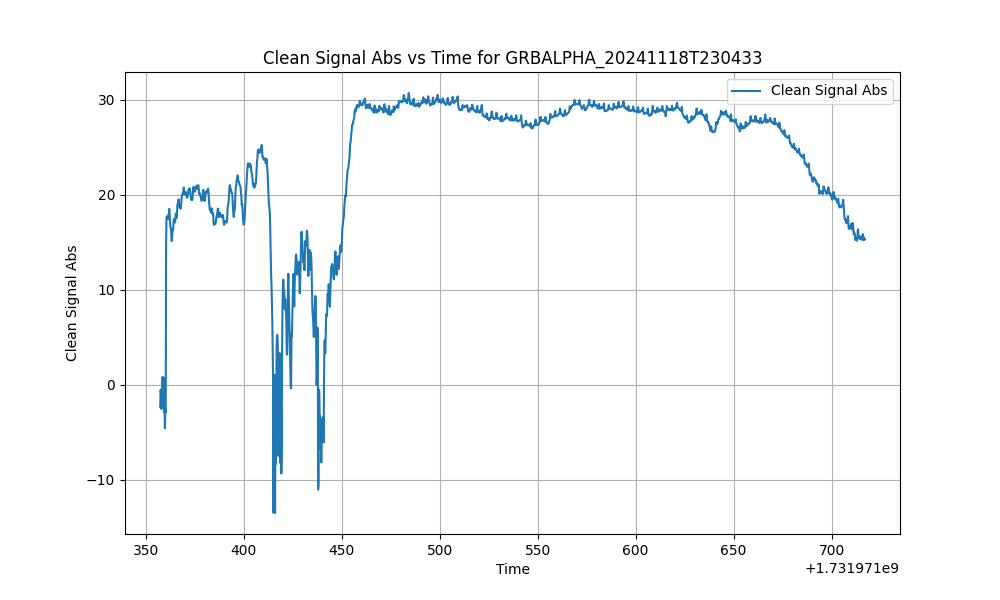

WGS84 latitude +57.0140 N longitude 9.9860 E elevation 20.0 m


In [12]:
for i,obj in enumerate(obj_act):
    if obj.filename == 'GRBALPHA_20241118T230433':
        print(i)
        print(obj.filename)
        plt.figure(figsize=(10, 6))
        plt.plot(obj.time_ax, obj.clean_sig_abs, label='Clean Signal Abs')
        plt.xlabel('Time')
        plt.ylabel('Clean Signal Abs')
        plt.title('Clean Signal Abs vs Time for GRBALPHA_20241118T230433')
        plt.legend()
        plt.grid(True)
        plt.show()
        plt.figure(figsize=(10, 6))
        plt.plot(obj.station_obj.timestamps, obj.clean_sig_abs, label='Clean Signal Abs')
        plt.xlabel('Time')
        plt.ylabel('Clean Signal Abs')
        plt.title('Clean Signal Abs vs Time for GRBALPHA_20241118T230433')
        plt.legend()
        plt.grid(True)
        plt.show()
        print(obj_act[i].station_obj._station_pos)

In [13]:
from skyfield.api import wgs84, load
import numpy as np

# Ground station coordinates (latitude, longitude, altitude)

passindex=78
obj=obj_act[passindex]

station =obj.station_obj._station_pos


# Observed azimuth and elevation
azimuth_degrees = obj.station_obj.azimuth
elevation_degrees = obj.station_obj.elevation

# Time of observation
ts = load.timescale()
time = obj.station_obj.timestamps
print(time)
# Step 1: Horizon vector (local frame)
azimuth_rad = np.radians(azimuth_degrees)
elevation_rad = np.radians(elevation_degrees)
v_horizon = np.array([
    np.cos(elevation_rad) * np.sin(azimuth_rad),  # North
    np.cos(elevation_rad) * np.cos(azimuth_rad),  # East
    np.sin(elevation_rad)                          # Zenith
])

# Step 2: Transform to ECEF
v_ecef = station.to_ecef_matrix() @ v_horizon

# Step 3: Transform to ECI
rotation_matrix = wgs84.rotation_at(time)
v_eci = rotation_matrix.T @ v_ecef

# Normalize (optional)
v_eci_normalized = v_eci / np.linalg.norm(v_eci)

print(f"Rotation axis in ECI: {v_eci_normalized}")


[[1.73197136e+09]
 [1.73197136e+09]
 [1.73197136e+09]
 ...
 [1.73197172e+09]
 [1.73197172e+09]
 [1.73197172e+09]]


AttributeError: 'GeographicPosition' object has no attribute 'to_ecef_matrix'

# weak attempt to try to model any kind of rotation axis

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# --- Input Data ---
# Time series (in seconds)
time = np.linspace(0, 100, 1000)  # Example time array

# Azimuth (radians), Elevation (radians), and Distance (km) arrays
azimuth = np.radians(np.linspace(0, 360, len(time)))  # Example azimuth
elevation = np.radians(45 + 10 * np.sin(2 * np.pi * time / 50))  # Example elevation
distance = 700 + 10 * np.cos(2 * np.pi * time / 50)  # Example distance (km)

# Observed signal strength (normalize or use actual measurements)
signal_obs = 10 + 3 * np.sin(2 * np.pi * time / 10) + 0.5 * np.random.randn(len(time))

# --- Step 1: Compute Line-of-Sight Vector ---
def compute_los(azimuth, elevation, distance):
    """Compute line-of-sight vector in Cartesian coordinates."""
    x = distance * np.cos(elevation) * np.cos(azimuth)
    y = distance * np.cos(elevation) * np.sin(azimuth)
    z = distance * np.sin(elevation)
    return np.vstack((x, y, z)).T  # Shape: (N, 3)

los_vectors = compute_los(azimuth, elevation, distance)

# --- Step 2: Define Satellite Rotation Model ---
def rotation_matrix(axis, angle):
    """Create a 3D rotation matrix for a given axis and angle."""
    axis = axis / np.linalg.norm(axis)  # Normalize axis
    cos_theta = np.cos(angle)
    sin_theta = np.sin(angle)
    ux, uy, uz = axis
    return np.array([
        [cos_theta + ux**2 * (1 - cos_theta), ux*uy*(1 - cos_theta) - uz*sin_theta, ux*uz*(1 - cos_theta) + uy*sin_theta],
        [uy*ux*(1 - cos_theta) + uz*sin_theta, cos_theta + uy**2 * (1 - cos_theta), uy*uz*(1 - cos_theta) - ux*sin_theta],
        [uz*ux*(1 - cos_theta) - uy*sin_theta, uz*uy*(1 - cos_theta) + ux*sin_theta, cos_theta + uz**2 * (1 - cos_theta)],
    ])

def predict_signal(axis, period, los_vectors, time):
    """Predict signal strength based on rotation and LOS vector."""
    omega = 2 * np.pi / period  # Angular velocity
    signal_pred = []
    for t, los in zip(time, los_vectors):
        # Rotate the satellite's body frame (assume initial pattern is along Z-axis)
        rot_mat = rotation_matrix(axis, omega * t)
        rotated_pattern = rot_mat @ np.array([0, 0, 1])  # Example pattern direction
        # Project onto LOS vector
        signal_strength = np.dot(rotated_pattern, los / np.linalg.norm(los))  # Simplified model
        signal_pred.append(signal_strength)
    return np.array(signal_pred)

# --- Step 3: Optimization to Fit Rotation Axis ---
def error_function(params, los_vectors, time, signal_obs):
    """Error function to minimize."""
    axis = params[:3]
    period = params[3]
    signal_pred = predict_signal(axis, period, los_vectors, time)
    return np.sum((signal_obs - signal_pred)**2)

# Initial guesses for rotation axis and period
initial_guess = [0, 0, 1, 10]  # Assume Z-axis and 10s period

# Optimize
result = minimize(error_function, initial_guess, args=(los_vectors, time, signal_obs), method='Nelder-Mead')
optimized_params = result.x
optimized_axis = optimized_params[:3]
optimized_period = optimized_params[3]

print(f"Optimized Rotation Axis: {optimized_axis}")
print(f"Optimized Rotation Period: {optimized_period:.2f} seconds")

# --- Step 4: Visualize Results ---
signal_pred = predict_signal(optimized_axis, optimized_period, los_vectors, time)

plt.figure(figsize=(10, 5))
plt.plot(time, signal_obs, label='Observed Signal', alpha=0.7)
plt.plot(time, signal_pred, label='Predicted Signal', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Signal Strength')
plt.legend()
plt.title('Signal Strength vs Time')
plt.show()

def dipole_pattern(dipole_axis, los_vector):
    """
    Calculate the dipole radiation pattern strength for a given LOS vector.
    :param dipole_axis: Axis of the dipole in satellite body frame (normalized vector).
    :param los_vector: Line-of-sight vector from the ground station to the satellite (normalized vector).
    :return: Dipole radiation strength (proportional to sin^2(theta')).
    """
    cos_theta = np.dot(dipole_axis, los_vector) / (np.linalg.norm(dipole_axis) * np.linalg.norm(los_vector))
    theta = np.arccos(np.clip(cos_theta, -1.0, 1.0))  # Ensure within valid range for acos
    return np.sin(theta)**2

def predict_signal_dipole(axis, period, los_vectors, time):
    """
    Predict signal strength using a dipole radiation pattern.
    :param axis: Rotation axis of the satellite.
    :param period: Rotation period of the satellite (seconds).
    :param los_vectors: Line-of-sight vectors to the satellite.
    :param time: Time array.
    :return: Predicted signal strength array.
    """
    omega = 2 * np.pi / period  # Angular velocity
    signal_pred = []
    for t, los in zip(time, los_vectors):
        # Rotate the satellite's body frame (assume dipole initially along Z-axis)
        rot_mat = rotation_matrix(axis, omega * t)
        rotated_dipole = rot_mat @ np.array([0, 0, 1])  # Dipole starts along Z-axis
        # Calculate dipole pattern strength
        signal_strength = dipole_pattern(rotated_dipole, los)
        signal_pred.append(signal_strength)
    return np.array(signal_pred)

# Update error function to use the dipole signal prediction
def error_function_dipole(params, los_vectors, time, signal_obs):
    """Error function to minimize for dipole pattern."""
    axis = params[:3]
    period = params[3]
    signal_pred = predict_signal_dipole(axis, period, los_vectors, time)
    return np.sum((signal_obs - signal_pred)**2)

# Optimize for the dipole case
initial_guess = [0, 0, 1, 10]  # Assume Z-axis and 10s period
result_dipole = minimize(error_function_dipole, initial_guess, args=(los_vectors, time, signal_obs), method='Nelder-Mead')
optimized_params_dipole = result_dipole.x
optimized_axis_dipole = optimized_params_dipole[:3]
optimized_period_dipole = optimized_params_dipole[3]

print(f"Optimized Dipole Rotation Axis: {optimized_axis_dipole}")
print(f"Optimized Dipole Rotation Period: {optimized_period_dipole:.2f} seconds")

# Predict and plot results
signal_pred_dipole = predict_signal_dipole(optimized_axis_dipole, optimized_period_dipole, los_vectors, time)

plt.figure(figsize=(10, 5))
plt.plot(time, signal_obs, label='Observed Signal', alpha=0.7)
plt.plot(time, signal_pred_dipole, label='Predicted Dipole Signal', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Signal Strength')
plt.legend()
plt.title('Dipole Signal Strength vs Time')
plt.show()


NameError: name 'minimize' is not defined

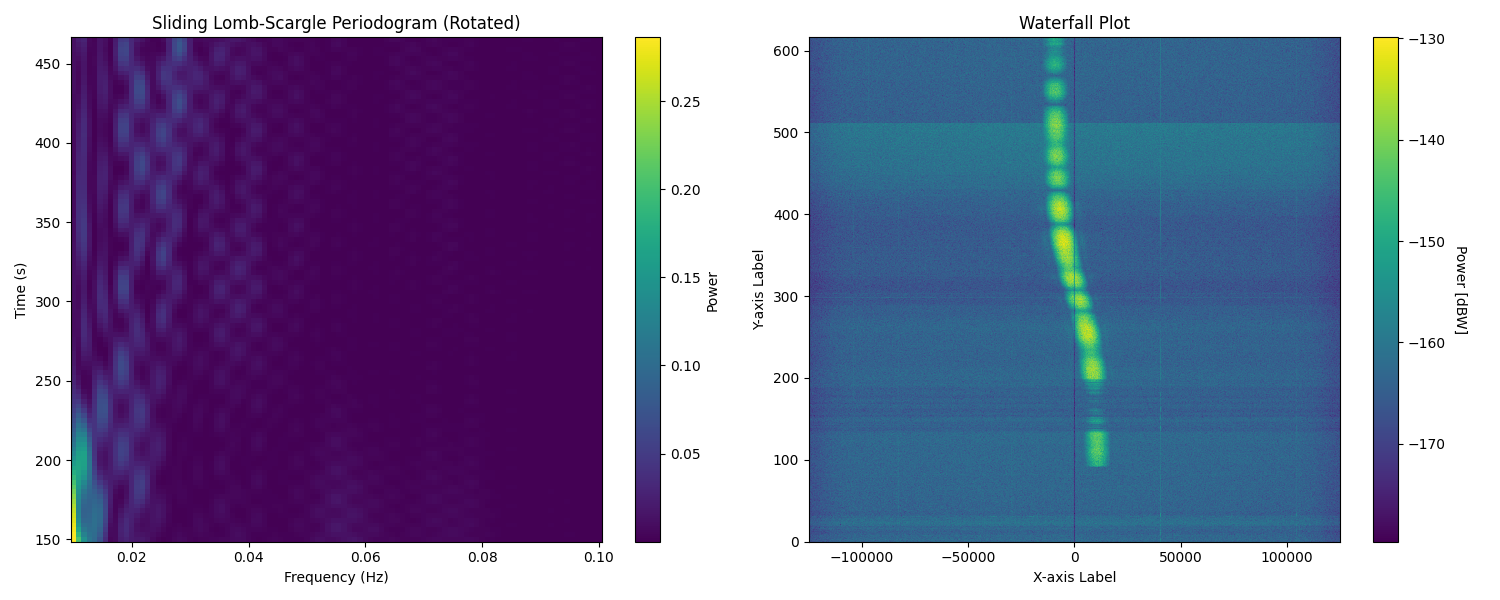

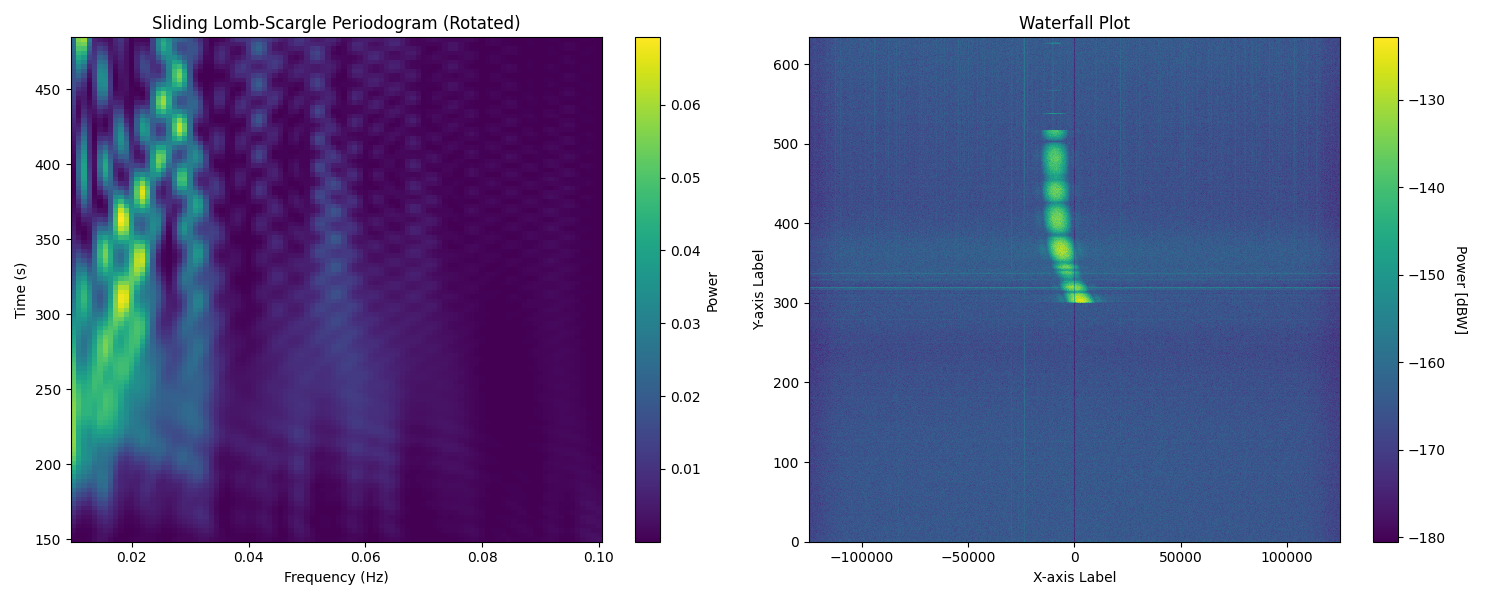

MemoryError: Unable to allocate 396. MiB for an array with shape (3164, 4096, 4) and data type float64

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous view', 'arrow-left', 'back'), ('Forward', 'Forward to next view', 'arrow-right', 'forward'), ('Pan', 'Left button pans, Right button zooms\nx/y fixes axis, CTRL fixes aspect', 'arrows', 'pan'), ('Zoom', 'Zoom to rectangle\nx/y fixes axis', 'square-o', 'zoom'), ('Download', 'Download plot', 'floppy-o', 'save_figure')]))

MemoryError: Unable to allocate 99.1 MiB for an array with shape (3172, 4095) and data type float64

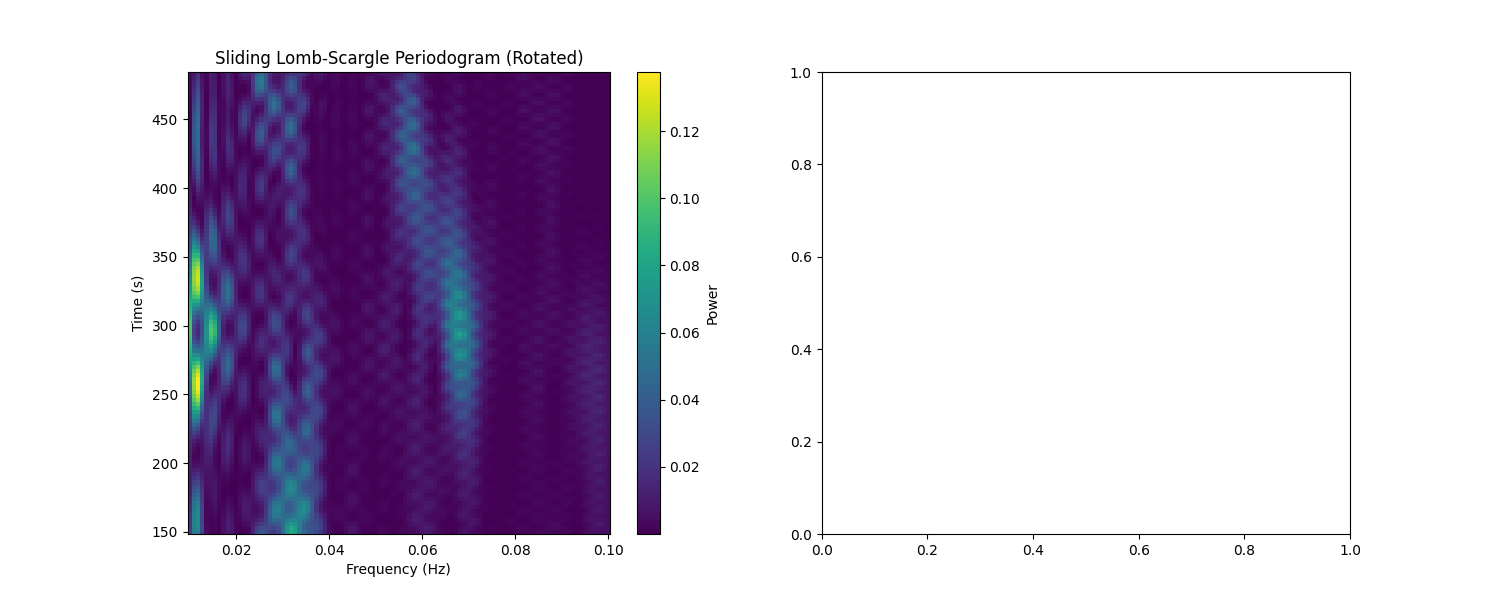

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle
from scipy.signal import windows

for obj in obj_act_top10[:4]:
    # Example time-series data (time and values)
    time = obj.time_ax.flatten()
    values = obj.clean_sig_abs.flatten()

    # Parameters
    window_length = 300  # Length of each window in seconds
    overlap_ratio = 0.99  # 50% overlap
    min_frequency = 0.01  # Minimum frequency for Lomb-Scargle
    max_frequency = 0.1   # Maximum frequency for Lomb-Scargle
    frequency_resolution = 100  # Number of frequency points

    # Calculate step size based on overlap
    step_size = window_length * (1 - overlap_ratio)

    # Sliding windows
    start_times = np.arange(time[0], time[-1] - window_length, step_size)
    frequencies = np.linspace(min_frequency, max_frequency, frequency_resolution)

    # Initialize results
    time_centers = []
    power_spectra = []

    for start_time in start_times:
        # Define the current window
        end_time = start_time + window_length
        mask = (time >= start_time) & (time < end_time)
        window_time = time[mask]
        window_values = values[mask]
        
        if len(window_time) > 0:
            # Apply Hamming window
            hamming_weights = windows.hamming(len(window_time))
            weighted_values = window_values * hamming_weights
            
            # Perform Lomb-Scargle analysis
            ls = LombScargle(window_time, weighted_values,normalization='standard')
            power = ls.power(frequencies)
            
            # Store results
            time_centers.append((start_time + end_time) / 2)
            power_spectra.append(power)

    # Convert results to numpy arrays
    time_centers = np.array(time_centers)
    power_spectra = np.array(power_spectra)


    # Set up the figure with two subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Plot 1: Sliding Lomb-Scargle Periodogram (Rotated)
    im1 = axes[0].pcolormesh(frequencies, time_centers, power_spectra, shading='auto', cmap='viridis')
    axes[0].set_xlabel('Frequency (Hz)')
    axes[0].set_ylabel('Time (s)')
    axes[0].set_title('Sliding Lomb-Scargle Periodogram (Rotated)')
    fig.colorbar(im1, ax=axes[0], label='Power')

    # Optional: Invert axes if needed
    # axes[0].invert_yaxis()
    # axes[0].invert_xaxis()

    # Plot 2: Waterfall plot (placeholder for obj_act_top10[0].noise_obj.plot_waterfall())
    # Replace this with the actual method or logic of your object
    obj.noise_obj.plot_waterfall()

    # Customize subplot
    axes[1].set_title('Waterfall Plot')
    axes[1].set_xlabel('X-axis Label')  # Replace with actual label
    axes[1].set_ylabel('Y-axis Label')  # Replace with actual label

    # Show the combined plots
    plt.tight_layout()
    plt.show()

